In [7]:
from maelzel.core import *
from IPython.display import Image

QEventLoop: Cannot be used without QApplication
QEventLoop: Cannot be used without QApplication
QSocketNotifier: Can only be used with threads started with QThread


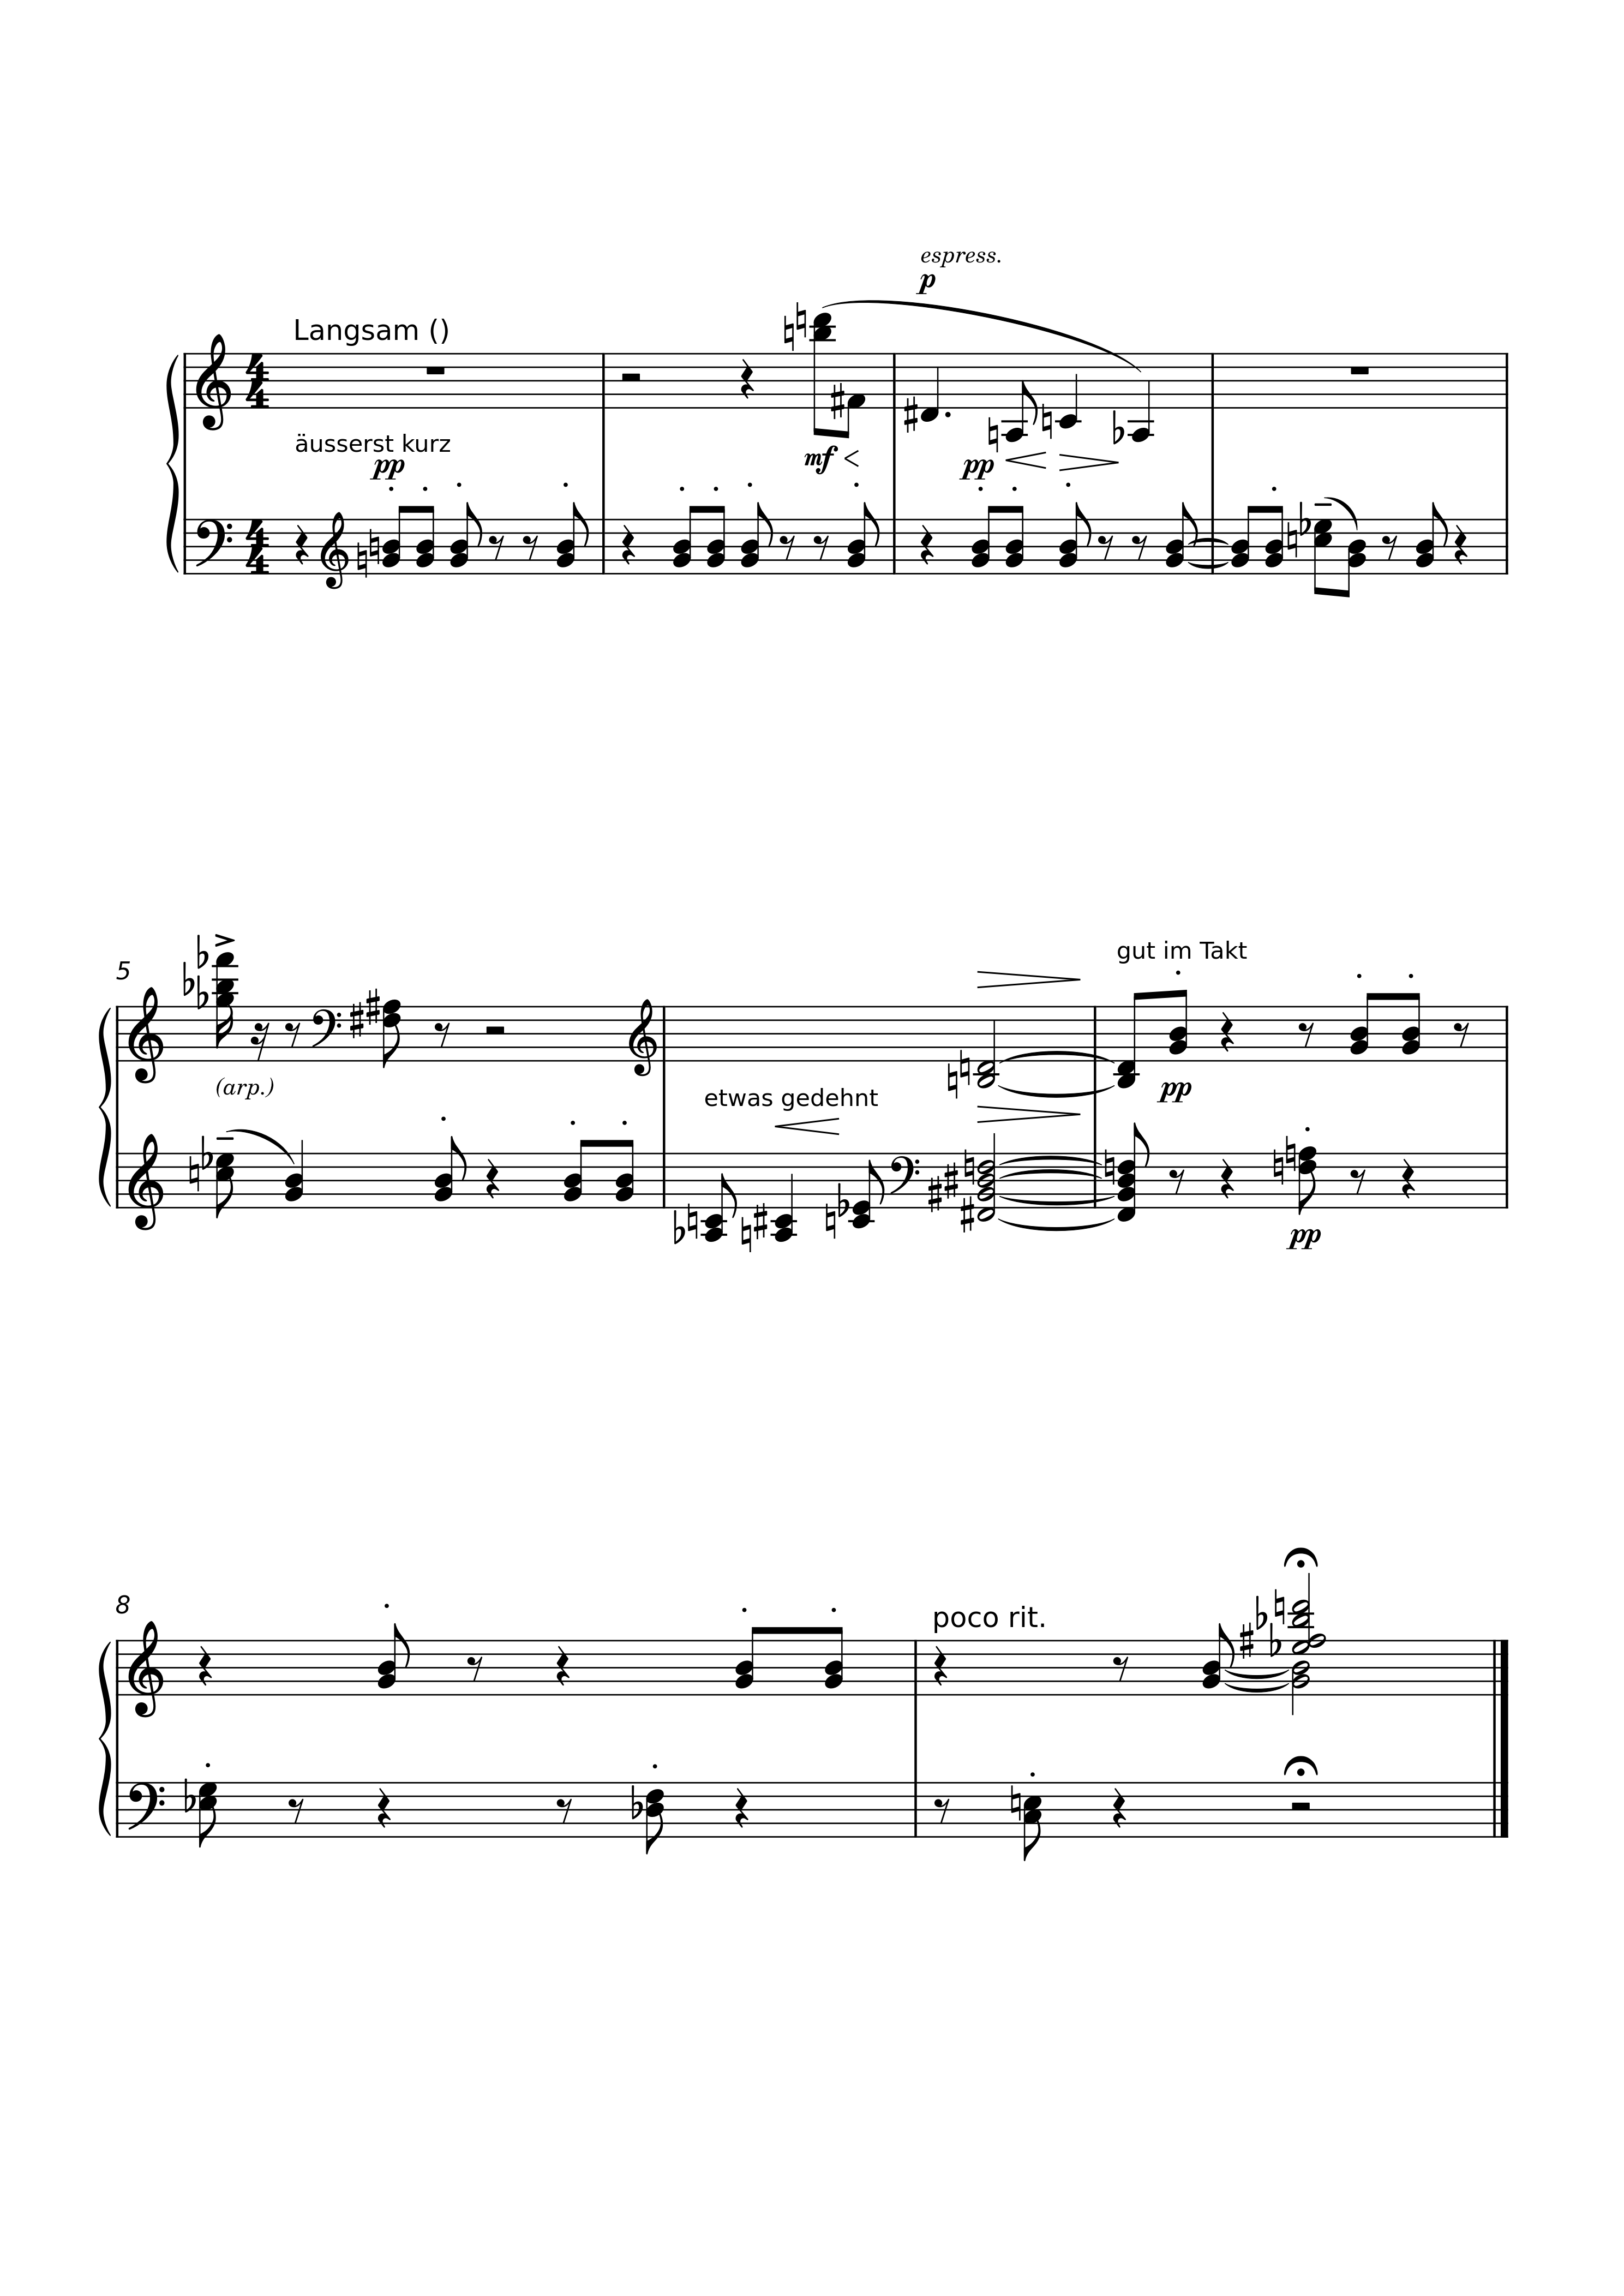

In [14]:
! musescore -o ~/tmp/shoenberg.png assets/schoenberg-op19-II.musicxml
Image("/home/em/tmp/shoenberg-1.png", width=800)

[maelzel.core:musicxmlparser.py:429 - _parseNote] No start spanner found for key slur-1


Score(3 voices)
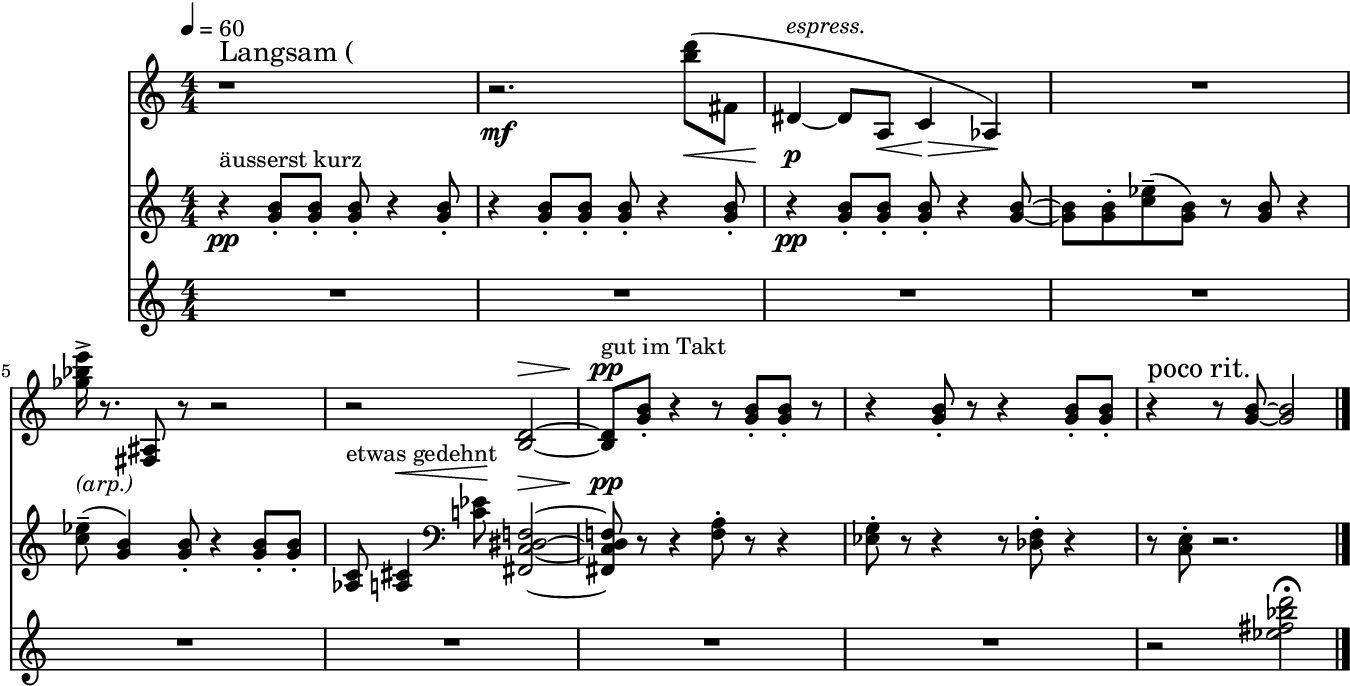

In [4]:
s = Score.read("assets/schoenberg-op19-II.musicxml")
s

In [20]:
! musescore -o ~/tmp/dynamics2.png --trim-image ../../test/musicxml/dynamics2.musicxml


QEventLoop: Cannot be used without QApplication
QEventLoop: Cannot be used without QApplication
QSocketNotifier: Can only be used with threads started with QThread
15:52:11.891 | ERROR | main_thread | CommandLineController | apply: Option: -T not recognized trim value: "../../test/musicxml/dynamics2.musicxml" 
15:52:11.892 | ERROR | main_thread | CommandLineController | apply: Option: -o no input file specified


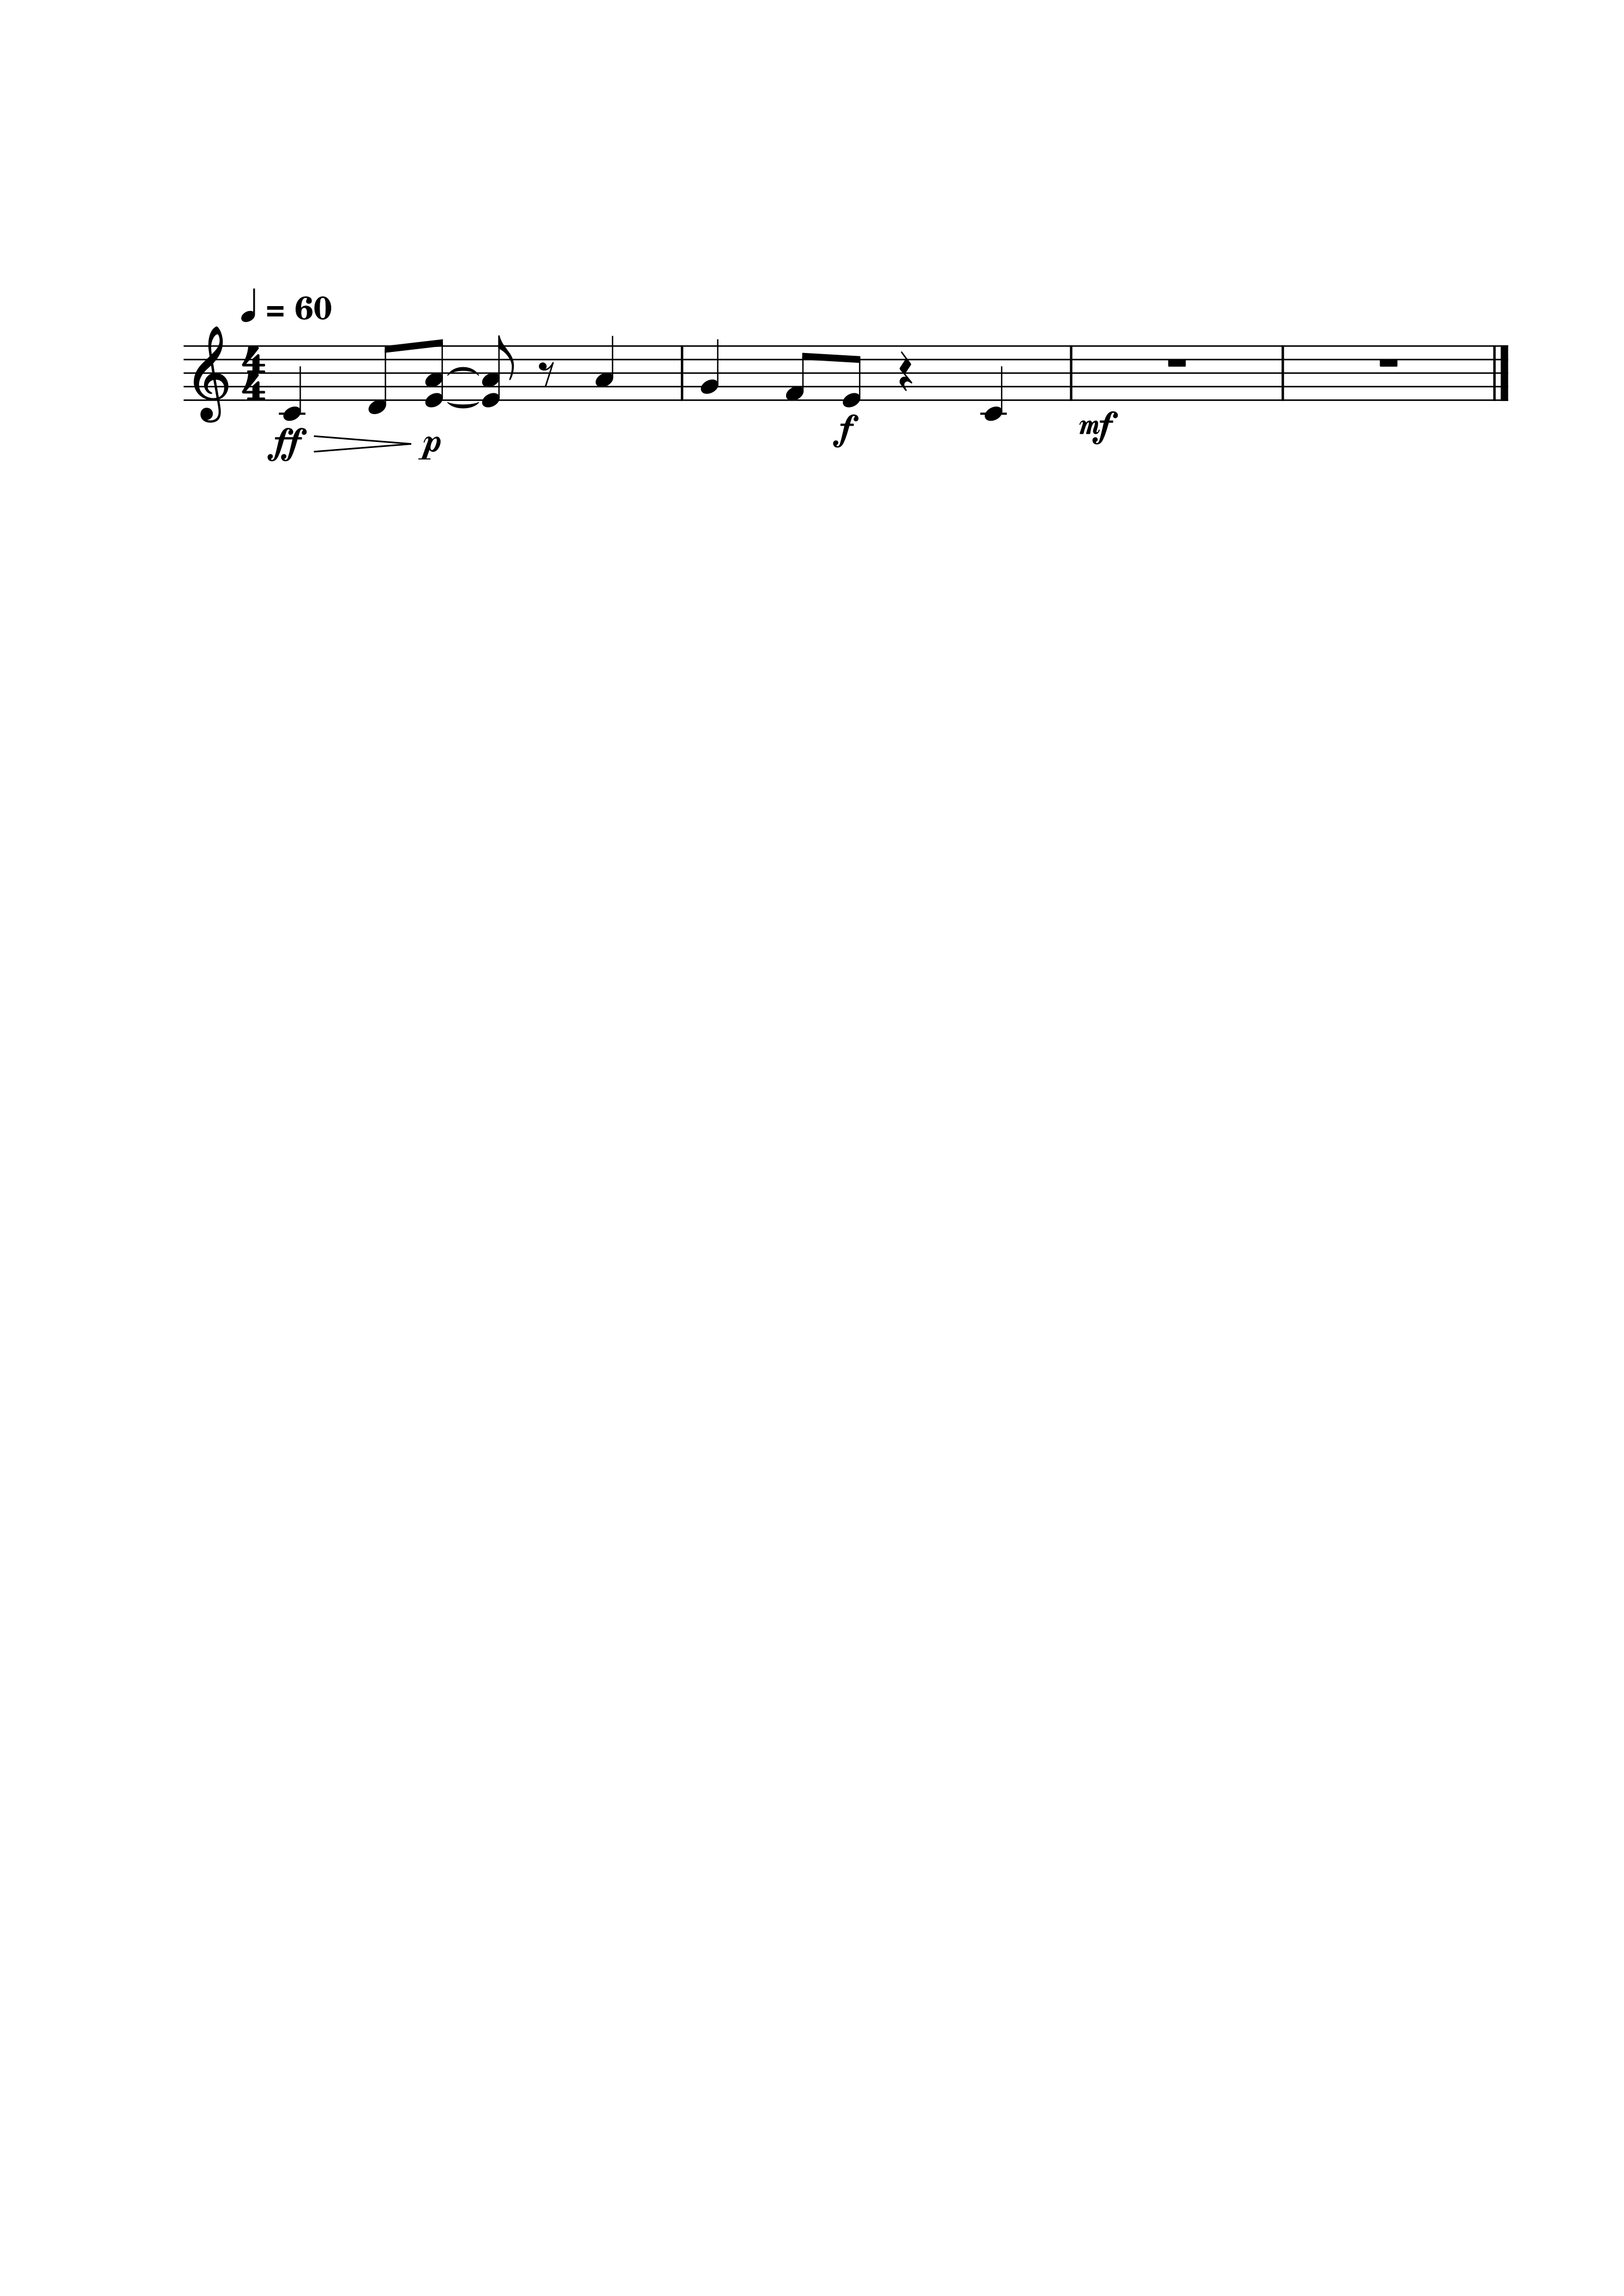

In [21]:
Image("/home/em/tmp/dynamics2-1.png", width=800)

Score(1 voices)
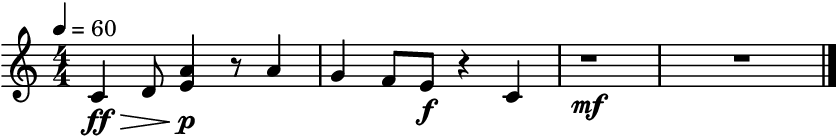

In [22]:
s2 = Score.read("../../test/musicxml/dynamics2.musicxml")
s2